In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [4]:
# load dataset of diabetes
diabetes = datasets.load_diabetes()


In [62]:
# Number of observations: 442, Number of features: 10; np.shape(diabetes.data)

# use only one feature: 
diabetes_X = np.expand_dims(diabetes.data[:,2], axis=1)

# split X data to training and test, X is independent variable
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# linear regression

In [71]:
# define the model
model_lr = linear_model.LinearRegression(fit_intercept=True)
# fit the model
model_lr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
# check coefficients
print('intercept = ' + str(model_lr.intercept_))
print('coefficient = ' + str(model_lr.coef_[0]))

intercept = 152.918861826
coefficient = 938.237861251


In [91]:
# check t-stats and p-value using statsmodels; sklearn does not report these
import statsmodels.api as sm
from scipy import stats

X = sm.add_constant(diabetes_X_train)
model_lr_sm = sm.OLS(diabetes_y_train, X).fit()
model_lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     211.7
Date:                Sun, 23 Jul 2017   Prob (F-statistic):           3.98e-39
Time:                        18:48:33   Log-Likelihood:                -2346.5
No. Observations:                 422   AIC:                             4697.
Df Residuals:                     420   BIC:                             4705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.9189      3.069     49.830      0.000     146.887     158.951
x1           938.2379     64.484     14.550      0.000     811.487    1064.989
==============================================================================
Omnibus:                       12.587   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.334
Skew:                           0.142   Prob(JB):                       0.0255
Kurtosis:                       2.420   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# calculate mean squared error
# predicted y/ fitted y:
y_test_hat = model_lr.predict(diabetes_X_test)
# the distance you didn't fit in: Residual / E / err / epsilon
residual = y_test_hat - diabetes_y_test
# error square:
err_sqt = residual**2
# find mean squared error:
mean_sqt_err = np.mean(err_sqt) 

print(mean_sqt_err)

2548.07239873


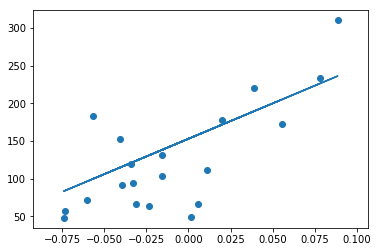

In [95]:
plt.scatter(diabetes_X_test, diabetes_y_test)
plt.plot(diabetes_X_test, y_test_hat)
plt.show()